# Plots for paper

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import json 
import pandas as pd 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [4]:
from plotting import plot_custom_corner

In [5]:
def plot_all_corners(path,seed,save_id,tol=0.01,npsr = 5):


    #default values of GW parameters
    ranges=[(4e-7,6e-7),(-np.pi,np.pi),(0.0+1.0,np.pi+1.0),(0.0,np.pi/2.0),(-np.pi/2 + 0.8,np.pi/2 + 0.8),(0.0,np.pi),(0.5e-12,1.5e-12)]
    injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-12]
    labels = [r'$\omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'h']
    variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
    axes_scales = None

    #Corner plot of GW parameters
    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=f'{save_id}_GW')




    #Plot f0 
    pulsars = pd.read_csv("../data/NANOGrav_pulsars.csv")
    true_f = pulsars["F0"].to_numpy()
    labels = [rf'$f_{i}$' for i in range(npsr)]
    idx = len(labels)
    injection_parameters = true_f[0:idx]
    variables_to_plot = [rf'f{i:02d}' for i in range(npsr)]
    ranges = [(i-np.abs(i*tol),i+np.abs(i*tol)) for i in injection_parameters]
    axes_scales = None
    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=f'{save_id}_f' )


    #Plot f1
    true_f = pulsars["F1"].to_numpy()

    labels = [r'$\dot{f}$' + rf'$_{i}$' for i in range(npsr)]
    idx = len(labels)
    injection_parameters = true_f[0:idx]
    variables_to_plot = [rf'fdot{i}' for i in range(npsr)] #["fdot0", "fdot1", "fdot2", "fdot3", "fdot4"]

    #tol = 0.01
    ranges = [(i-np.abs(i*tol),i+np.abs(i*tol)) for i in injection_parameters]
    axes_scales = None
    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=f'{save_id}_fdot')


    #Plot sigma_p, log scaled
    generator = np.random.default_rng(seed)
    σp = generator.uniform(low = 1e-21,high=1e-19,size=len(true_f))

        
    labels = [r'$\sigma_p^0$',r'$\sigma_p^1$',r'$\sigma_p^2$',r'$\sigma_p^3$', r'$\sigma_p^4$']
    idx = len(labels)
    injection_parameters = σp[0:idx]
    variables_to_plot    = ["sigma_p0", "sigma_p1", "sigma_p2", "sigma_p3", "sigma_p4"]
    ranges = [(1e-22,1e-18) for i in injection_parameters]




    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=f'{save_id}_sigma_p',logscale=True)




The evidence is: -538390.4589345414
Number of samples:
9014
Truths/Medians/Variances
$\omega$ 5e-07 5.000234522286142e-07 2.2883738792873465e-23
$\Phi_0$ 0.2 0.1992964000823051 6.904913459593882e-07
$\psi$ 2.5 2.5936897969277437 3.460670875229759e-07
$\iota$ 1.0 0.3535928017319755 0.0005864212093686112
$\delta$ 1.0 1.0008497357527735 4.0490326277612555e-07
$\alpha$ 1.0 1.0391836859473838 1.9733757745386018e-07
h 1e-12 8.655206880165441e-13 5.474438463930051e-29
running with increased label size


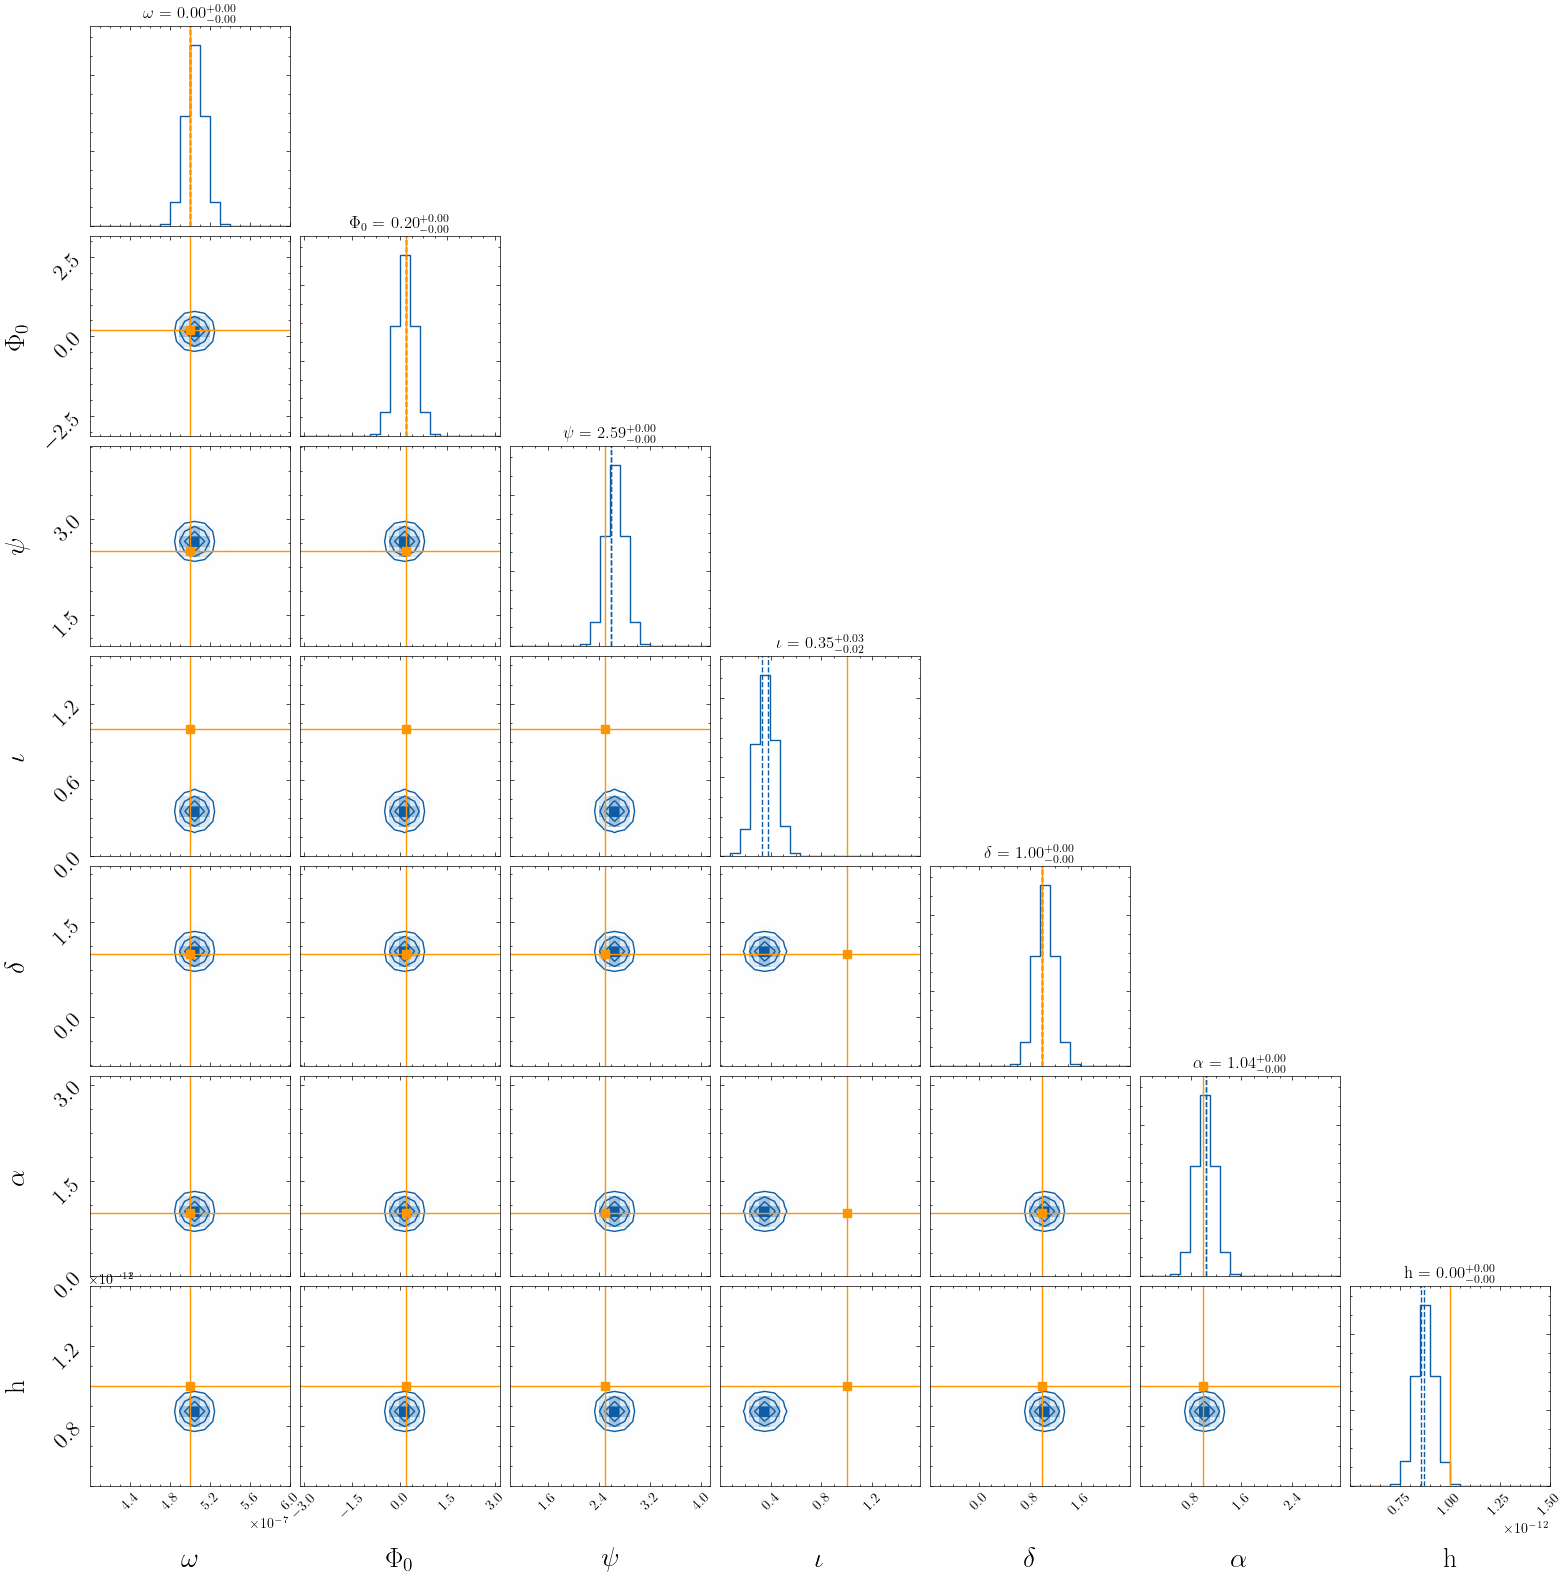

**********************************************************************
The evidence is: -538390.4589345414
Number of samples:
9014
Truths/Medians/Variances
$f_0$ 327.8470205611185 330.3210906248021 0.13648041202230532
$f_1$ 205.53069910059 205.84082500774684 0.14261151536982683
$f_2$ 303.0909794113198 302.6373601569511 1.5335447572677061
$f_3$ 326.600561967271 329.39334646287375 0.08233227956247775
$f_4$ 348.5592316999902 348.46662255095373 2.4976687461338694
running with increased label size


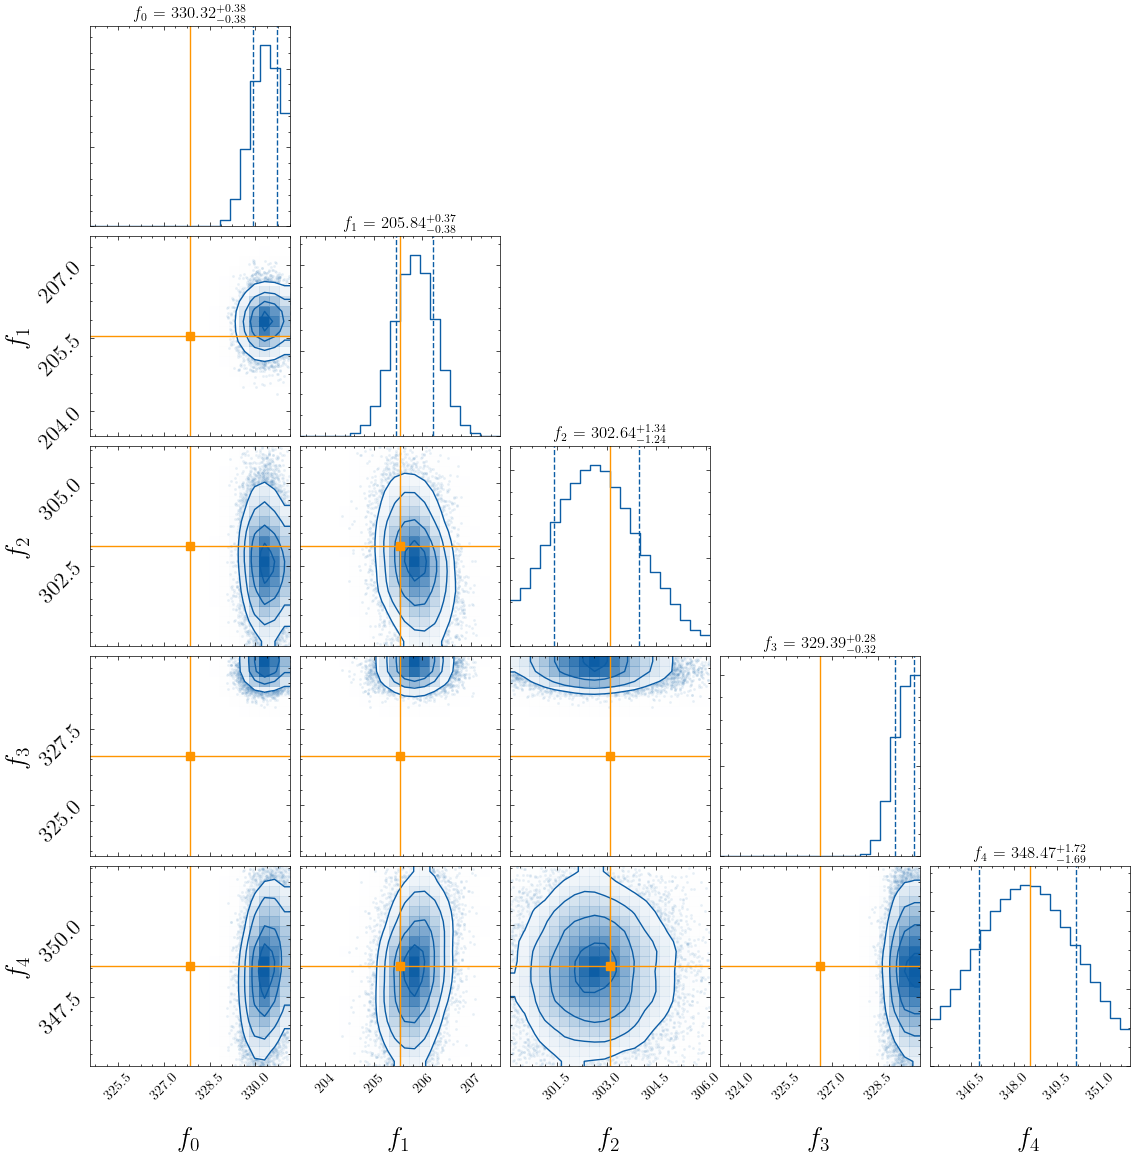

**********************************************************************
The evidence is: -538390.4589345414
Number of samples:
9014
Truths/Medians/Variances
$\dot{f}$$_0$ -1.227834e-15 -1.2354211539871628e-15 1.0309556395869011e-35
$\dot{f}$$_1$ -4.297e-16 -4.2791294296832004e-16 2.686889093583242e-36
$\dot{f}$$_2$ -6.4737e-16 -6.438568688383296e-16 3.932743246574505e-36
$\dot{f}$$_3$ -1.022991e-15 -1.0190541266483254e-15 1.8126545319836802e-35
$\dot{f}$$_4$ -4.1895e-16 -4.2035835637085047e-16 2.6835275063716922e-36
running with increased label size


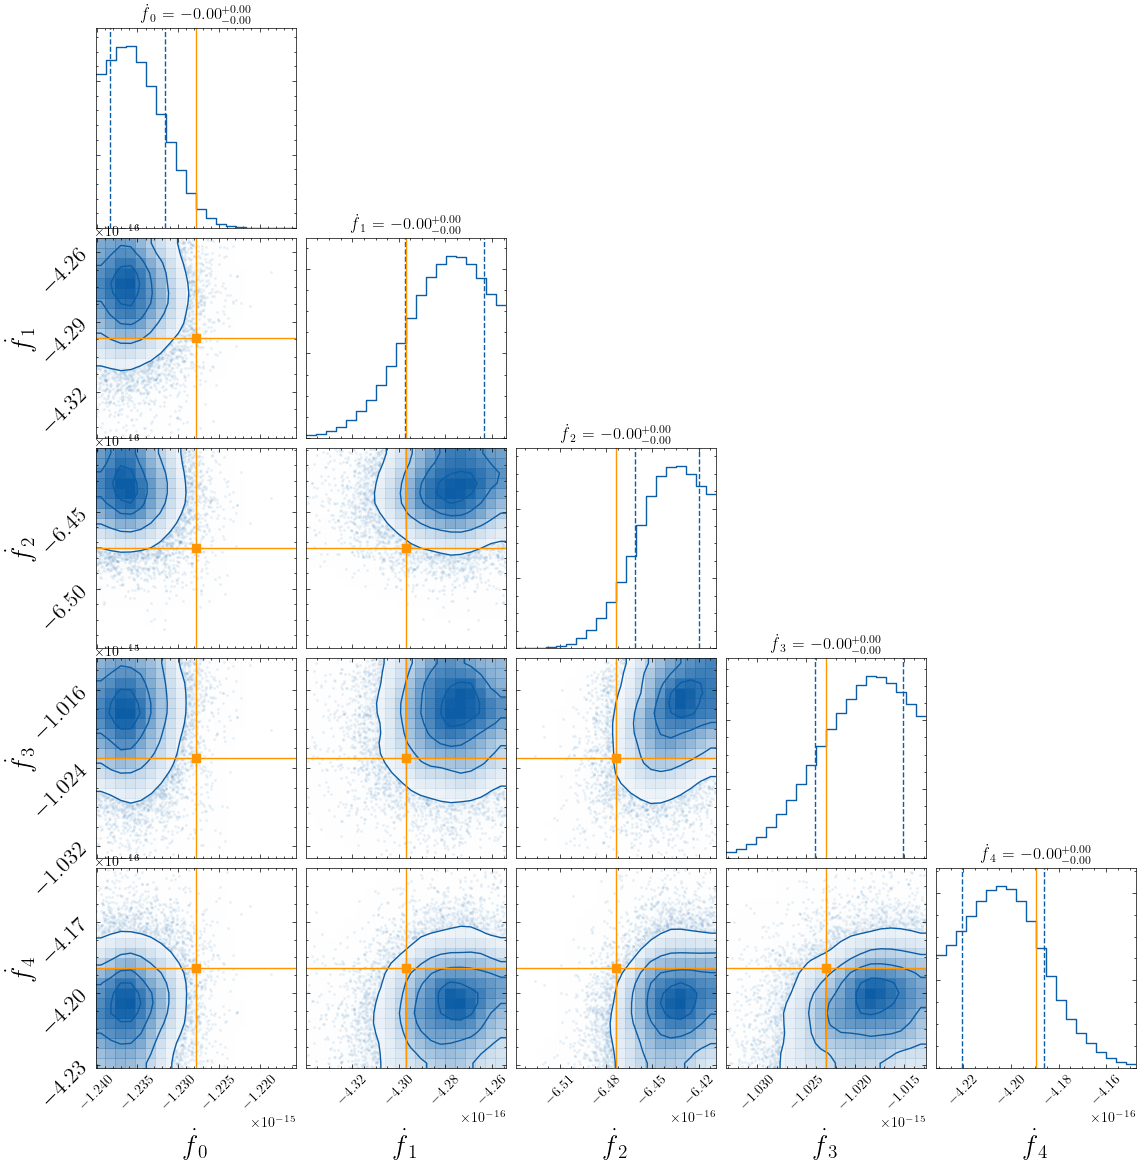

**********************************************************************
The evidence is: -538390.4589345414
Number of samples:
9014
Truths/Medians/Variances
$\sigma_p^0$ 5.054028399366765e-20 2.0190241814996702e-20 4.9176134675082355e-40
$\sigma_p^1$ 6.644933202006474e-20 2.6319737201244965e-20 5.235489447616525e-40
$\sigma_p^2$ 2.4231055016152945e-20 7.046905446800624e-21 1.209562970669994e-40
$\sigma_p^3$ 5.255055881680675e-21 3.055443234648835e-20 6.651663737472743e-40
$\sigma_p^4$ 4.059888409075103e-20 8.929545107093573e-21 1.8464200789075162e-40
running with increased label size


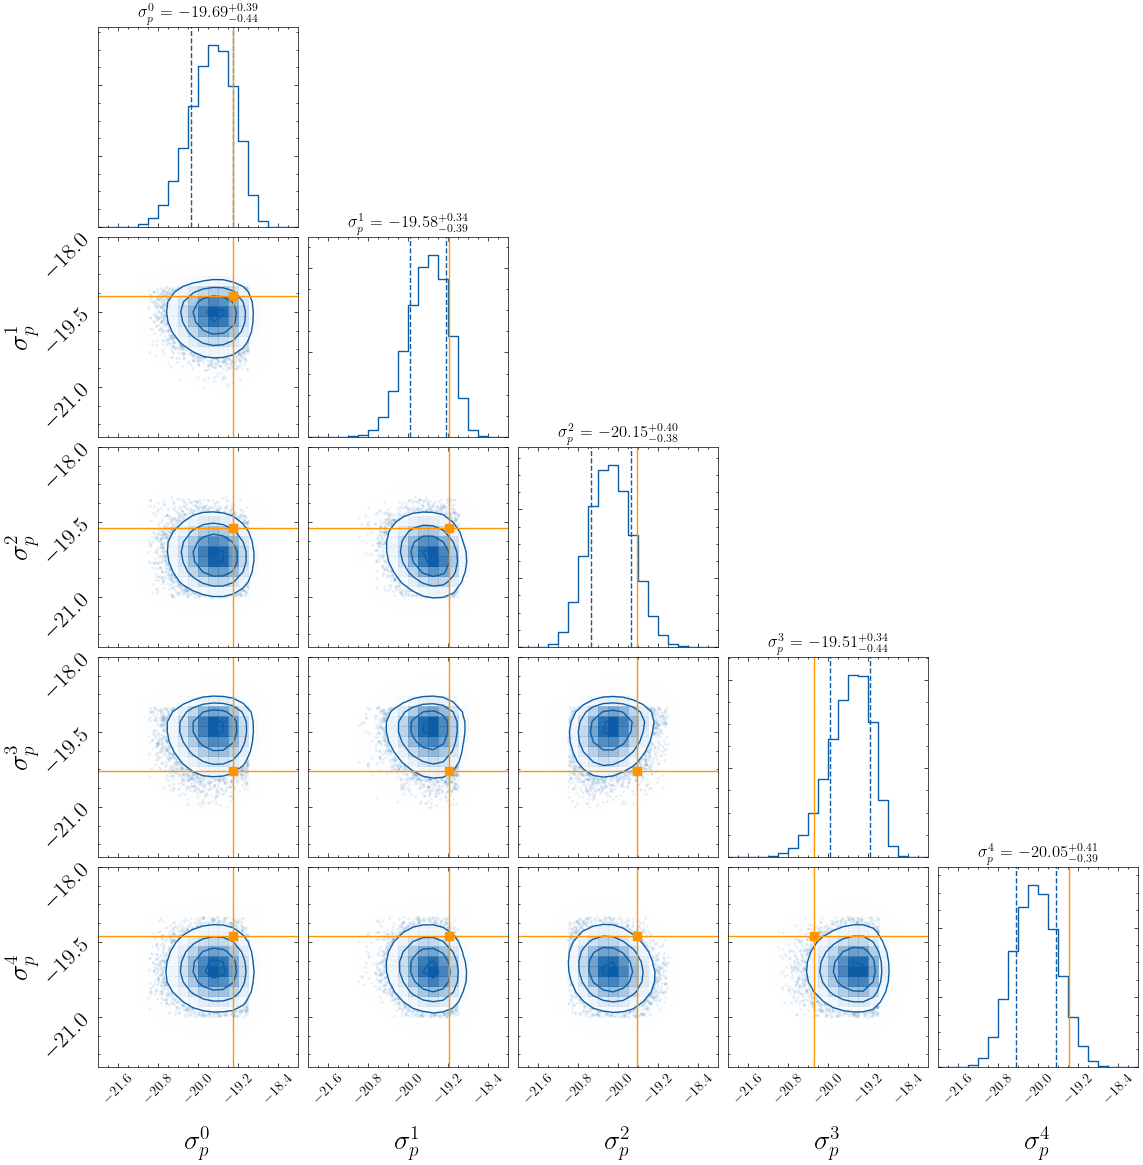

**********************************************************************


In [31]:
import numpy as np 
path = "../data/nested_sampling/data_for_manuscript/paper_canonical_example_earth_terms_1237_result.json"
plot_all_corners(path,1237,save_id='representative_example')

### Version 2: same settings just run again to account for noise of sampler

The evidence is: -538100.848569793
Number of samples:
6662
Truths/Medians/Variances
$\omega$ 5e-07 5.000025585246005e-07 2.0216058058476435e-23
$\Phi_0$ 0.2 0.19431272952866657 5.492024712492025e-07
$\psi$ 2.5 2.5990842417723785 3.163586962623134e-07
$\iota$ 1.0 0.7056147629276832 0.006118553964574223
$\delta$ 1.0 1.0019729392831482 1.8170782112164935e-07
$\alpha$ 1.0 1.0418855445212878 1.445432853268127e-07
h 1e-12 1.0316406149678633e-12 2.510600883128918e-27
running with increased label size


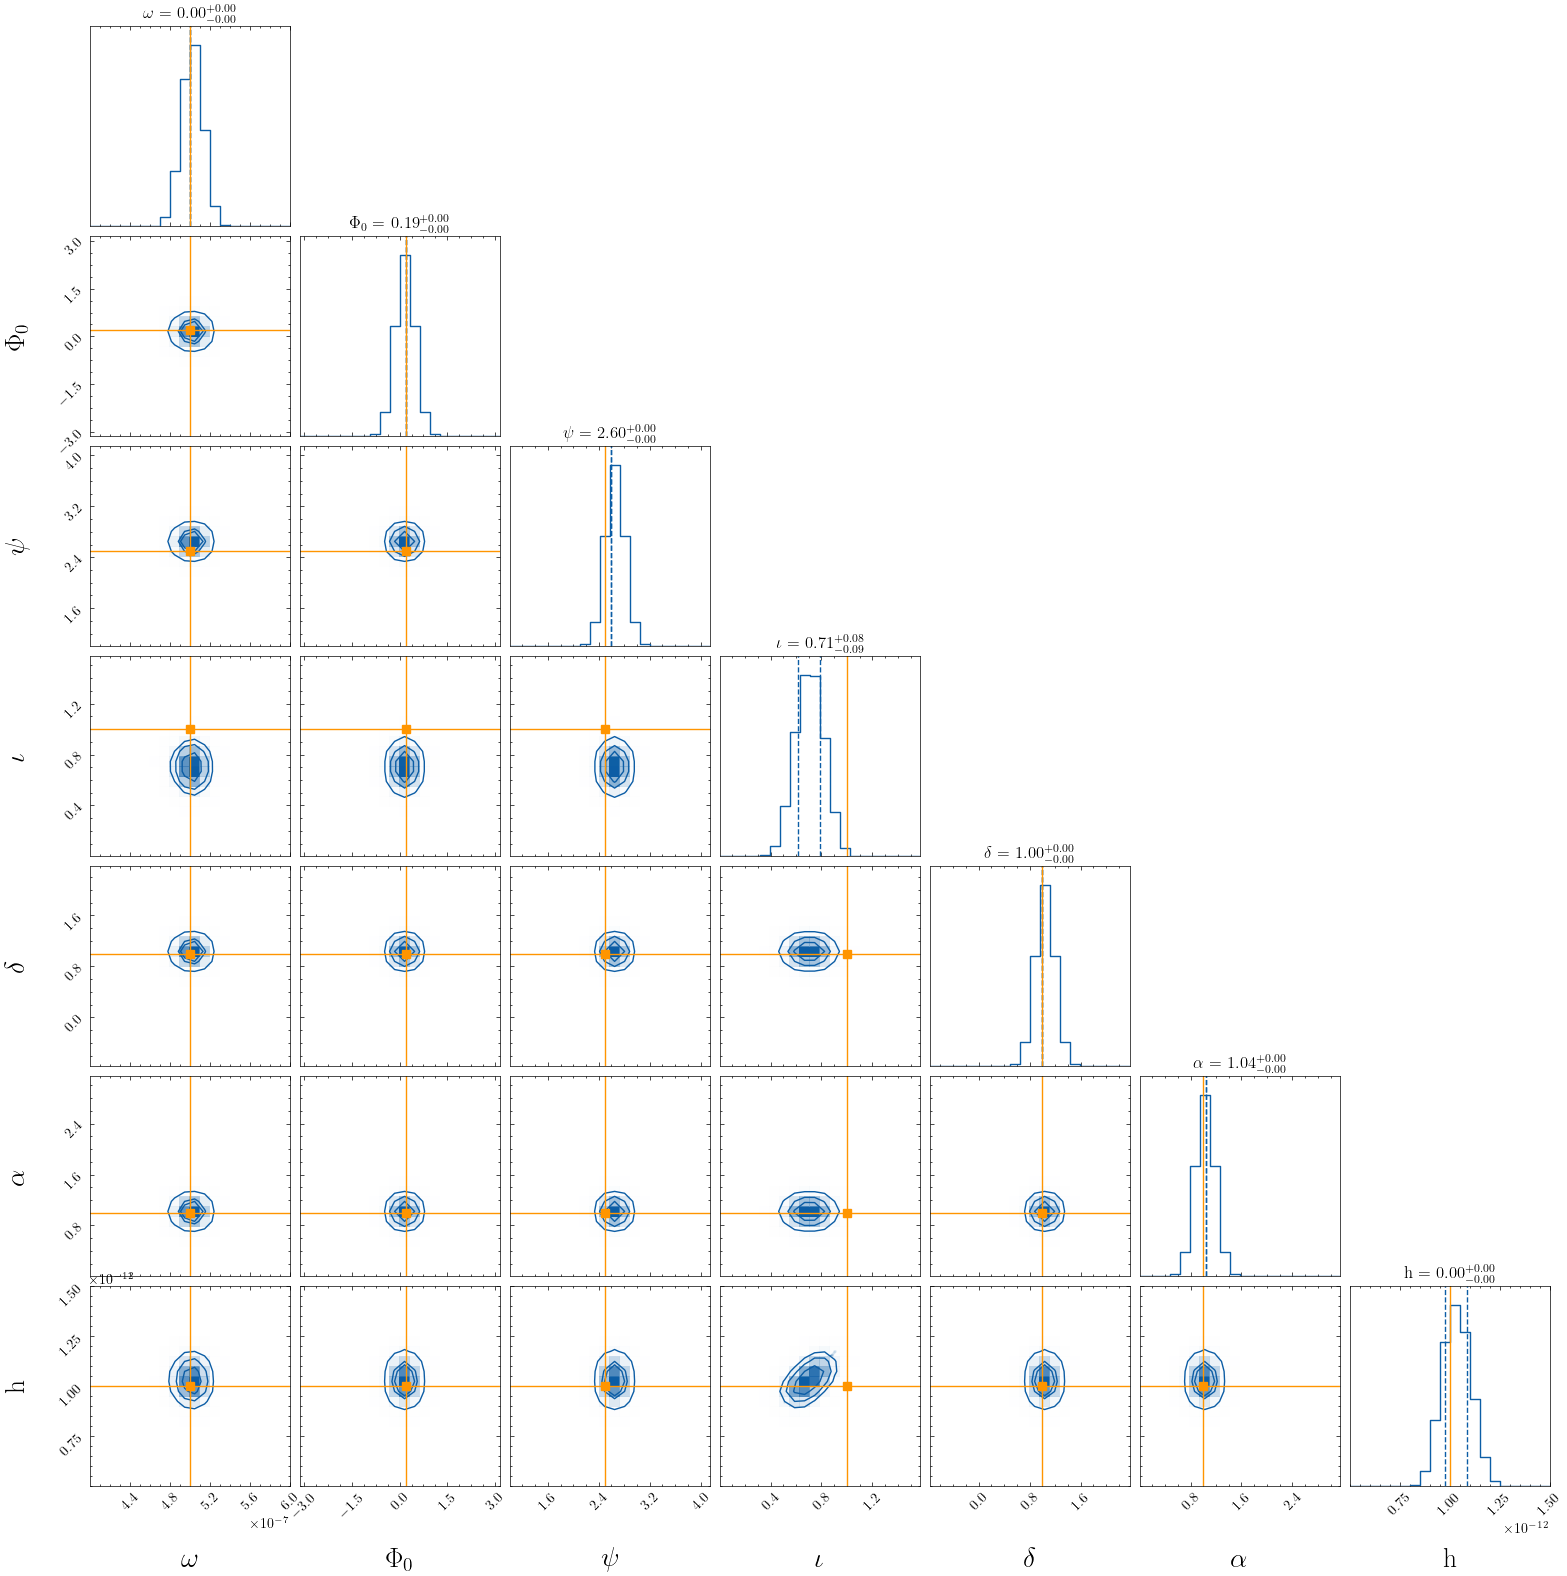

**********************************************************************
The evidence is: -538100.848569793
Number of samples:
6662
Truths/Medians/Variances
$f_0$ 327.8470205611185 330.7176667741129 0.08740084618159755
$f_1$ 205.53069910059 206.39846976800828 0.1351165769863264
$f_2$ 303.0909794113198 302.6428508508213 1.521857752837694
$f_3$ 326.600561967271 329.0880020012936 0.13695410342651188
$f_4$ 348.5592316999902 346.52948248624386 0.8255290904940078
running with increased label size


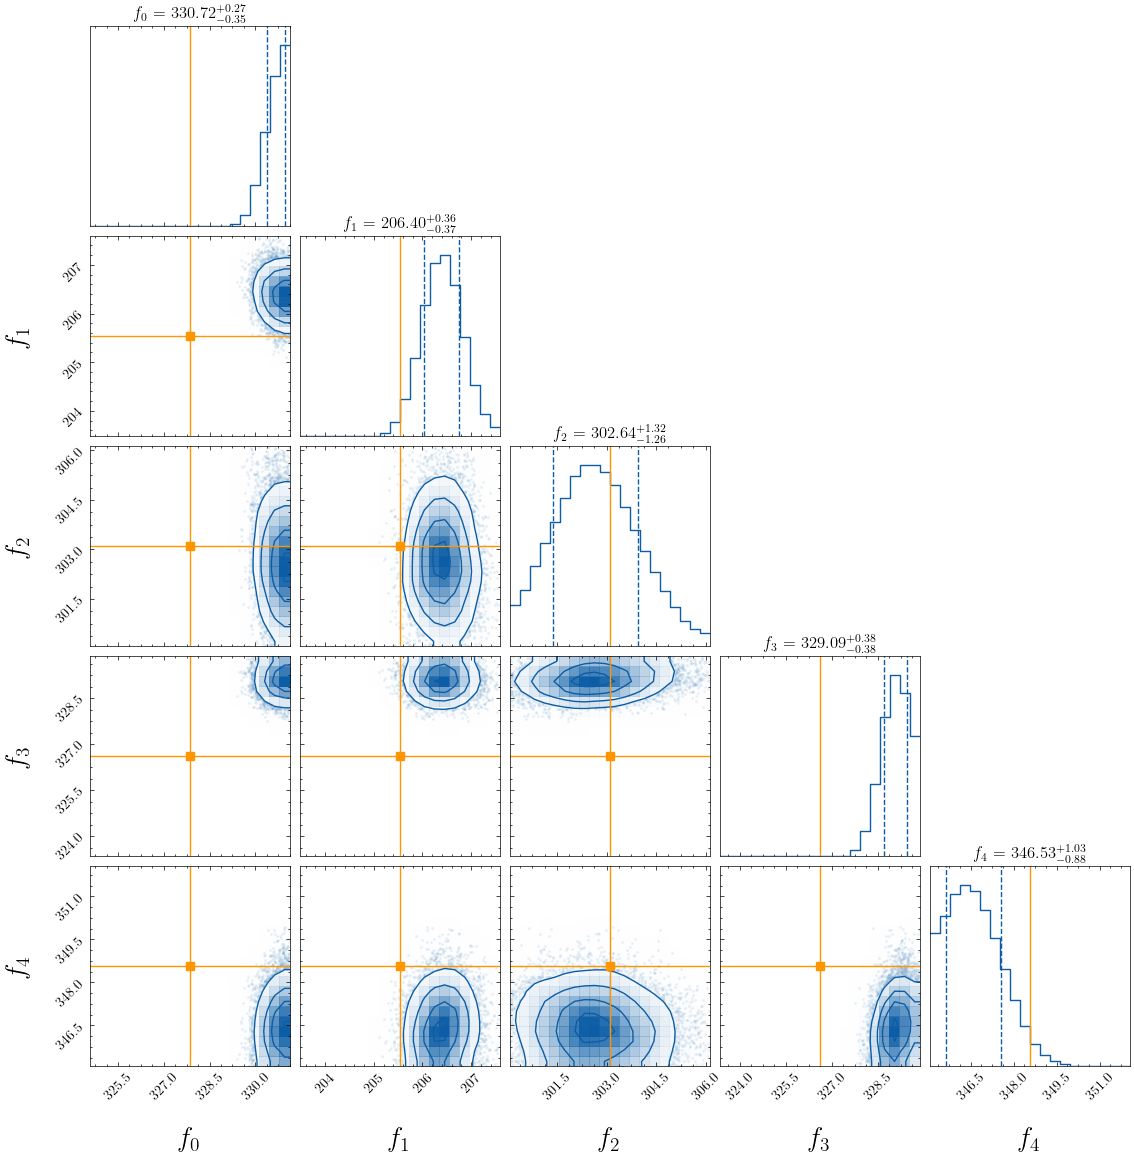

**********************************************************************
The evidence is: -538100.848569793
Number of samples:
6662
Truths/Medians/Variances
$\dot{f}_0$ -1.227834e-15 -1.2354263911251463e-15 1.3830545681239448e-35
$\dot{f}_1$ -4.297e-16 -4.2886619374335503e-16 2.838499072327581e-36
$\dot{f}_2$ -6.4737e-16 -6.487043191321126e-16 8.067596810377025e-36
$\dot{f}_3$ -1.022991e-15 -1.0251789565042154e-15 1.1935828801106825e-35
$\dot{f}_4$ -4.1895e-16 -4.1750950496079563e-16 2.0758208008334156e-36
running with increased label size


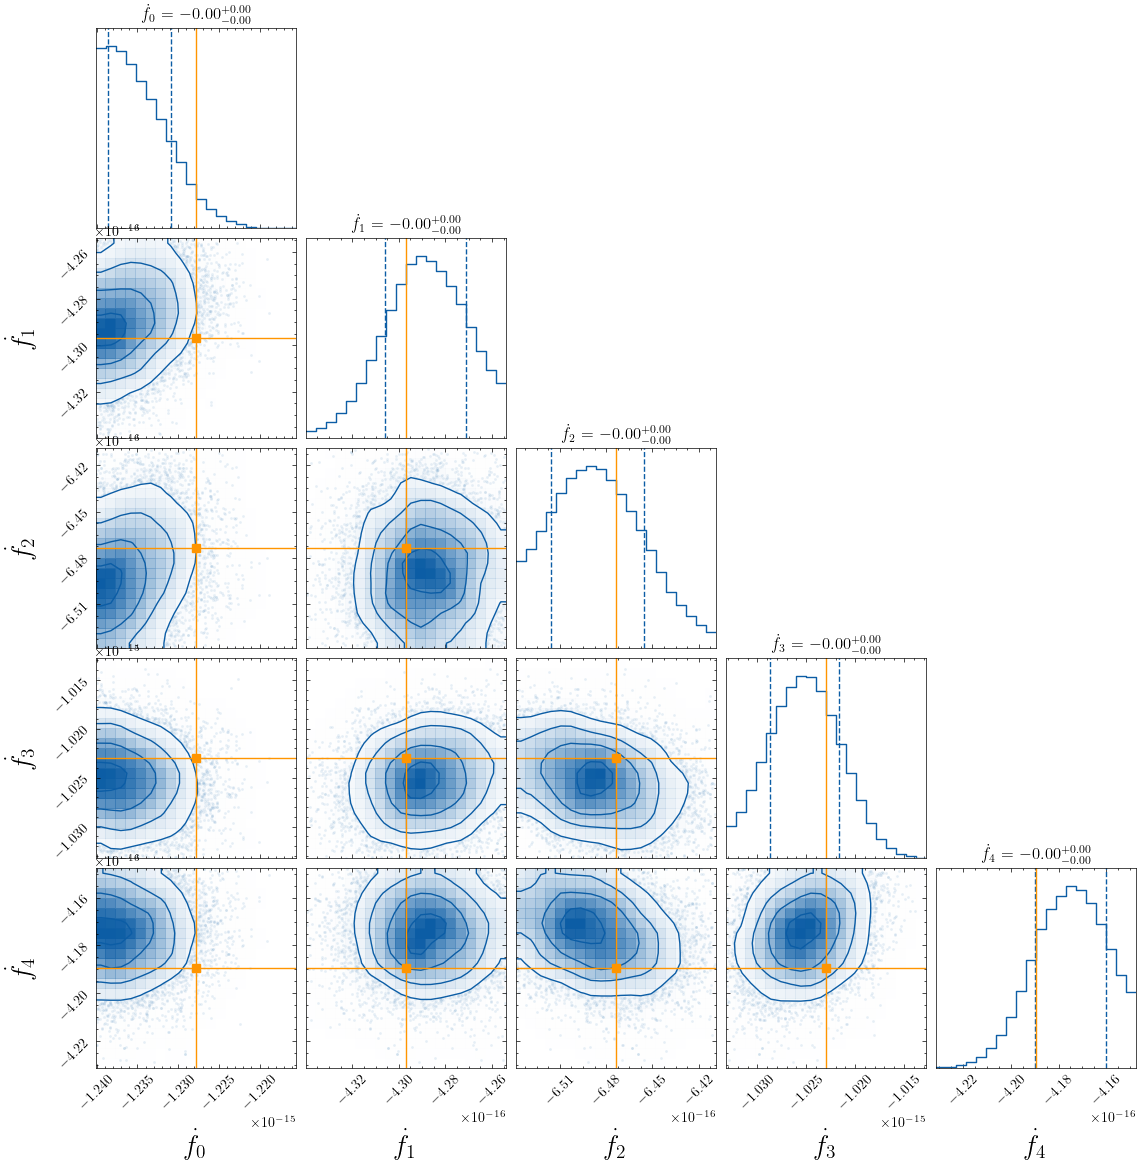

**********************************************************************
The evidence is: -538100.848569793
Number of samples:
6662
Truths/Medians/Variances
$\sigma_p^0$ 5.054028399366765e-20 3.411811853509795e-21 2.272054515096462e-41
$\sigma_p^1$ 6.644933202006474e-20 1.1664954489391924e-20 3.2787605818794362e-40
$\sigma_p^2$ 2.4231055016152945e-20 4.150707088931644e-21 6.731474963643288e-41
$\sigma_p^3$ 5.255055881680675e-21 5.4602371849959744e-21 1.0078294655417454e-40
$\sigma_p^4$ 4.059888409075103e-20 7.009394219778855e-21 1.4260365085094864e-40
running with increased label size


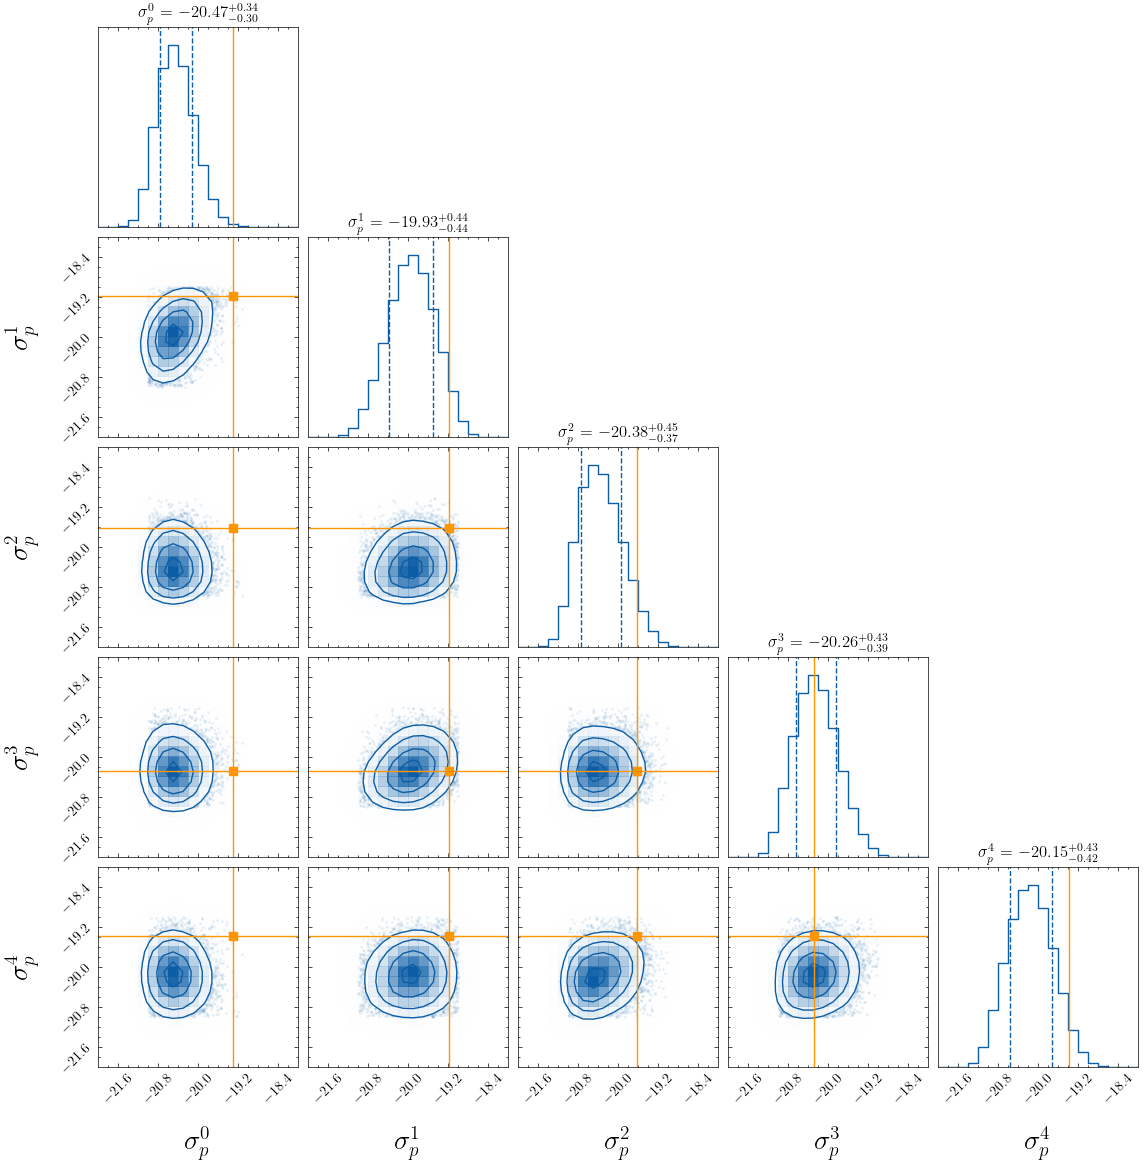

**********************************************************************


In [9]:
import numpy as np 
path = "../data/nested_sampling/data_for_manuscript/paper_canonical_example_earth_terms_1237_v2_result.json"
plot_all_corners(path,1237,save_id='representative_example_v2',tol=0.01)

## v3 - one more run just to explore noise

The evidence is: -860936.8612164545
Number of samples:
17872
Truths/Medians/Variances
$\omega$ 5e-07 4.999726809453839e-07 3.347259021654913e-23
$\Phi_0$ 0.2 0.18281594959135347 1.055522646031331e-06
$\psi$ 2.5 0.8628893008802624 5.233380106437761e-07
$\iota$ 1.0 0.4958026416031135 0.0009986919702820562
$\delta$ 1.0 0.9407735542980014 8.59128708094767e-09
$\alpha$ 1.0 2.5270446191025515 5.315185885187083e-07
h 1e-12 9.394964967700146e-13 1.7736803741031903e-28
running with increased label size
Exception - likely because corner.corner cannot find nice contours since NS did not coverge well
There is probably a large difference in the medians and the truth values
Skipping plotting
**********************************************************************
The evidence is: -860936.8612164545
Number of samples:
17872
Truths/Medians/Variances
$f_0$ 327.8470205611185 329.92465631768823 0.33417828250810994
$f_1$ 205.53069910059 206.26151791777852 0.3132901926500755
$f_2$ 303.0909794113198 301.47872

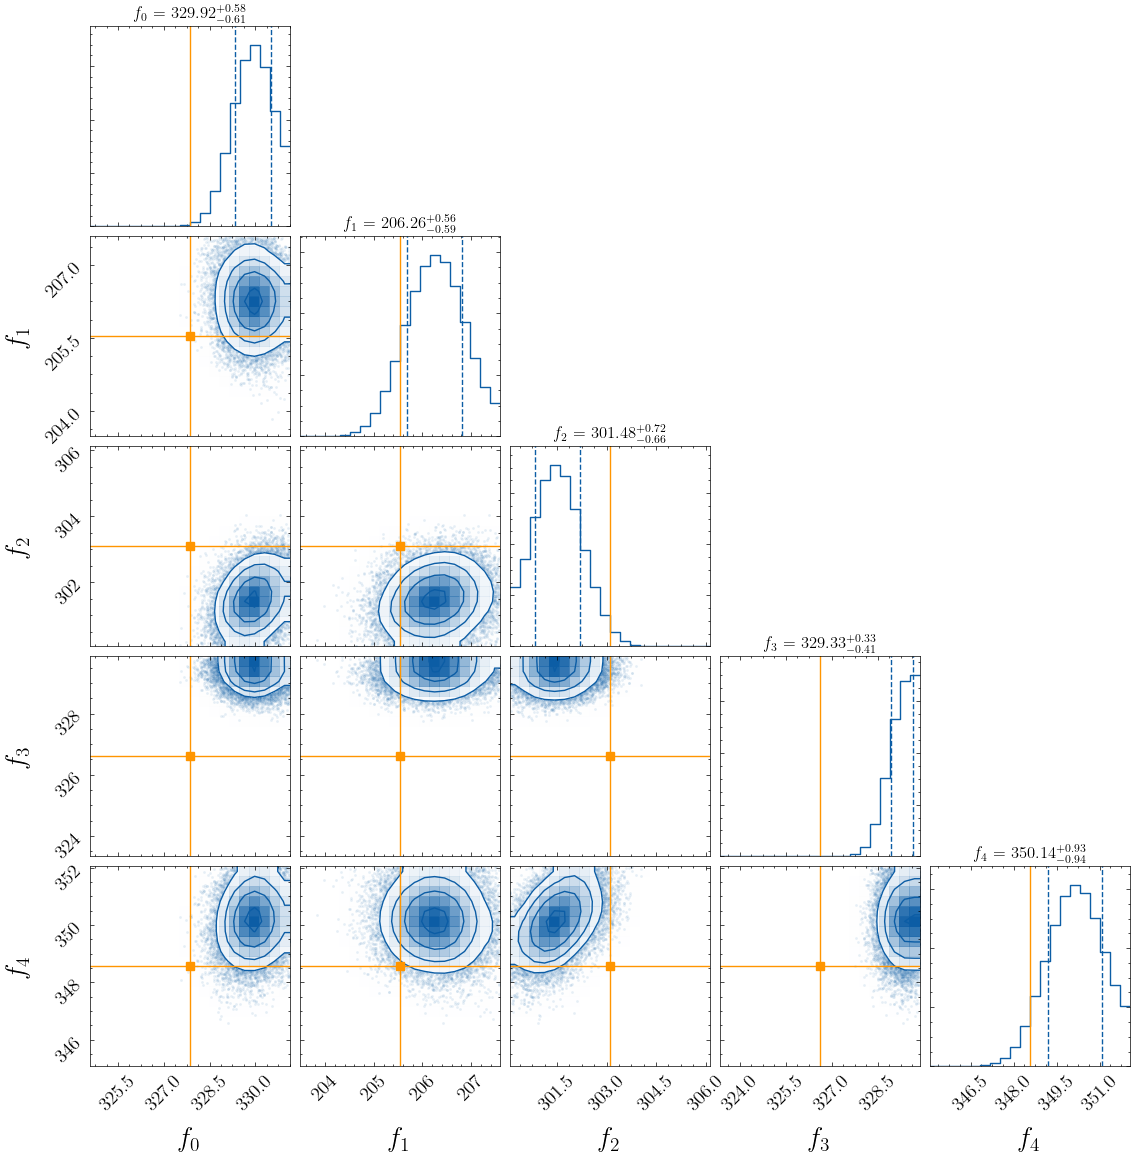

**********************************************************************
The evidence is: -860936.8612164545
Number of samples:
17872
Truths/Medians/Variances
$\dot{f}$$_0$ -1.227834e-15 -1.2343295049638293e-15 2.0523922331079536e-35
$\dot{f}$$_1$ -4.297e-16 -4.3026277471334156e-16 3.4726657782040745e-36
$\dot{f}$$_2$ -6.4737e-16 -6.473192324317225e-16 9.369254935295681e-36
$\dot{f}$$_3$ -1.022991e-15 -1.0250864295554774e-15 1.990184436187644e-35
$\dot{f}$$_4$ -4.1895e-16 -4.205571736650064e-16 2.8531025001742964e-36
running with increased label size


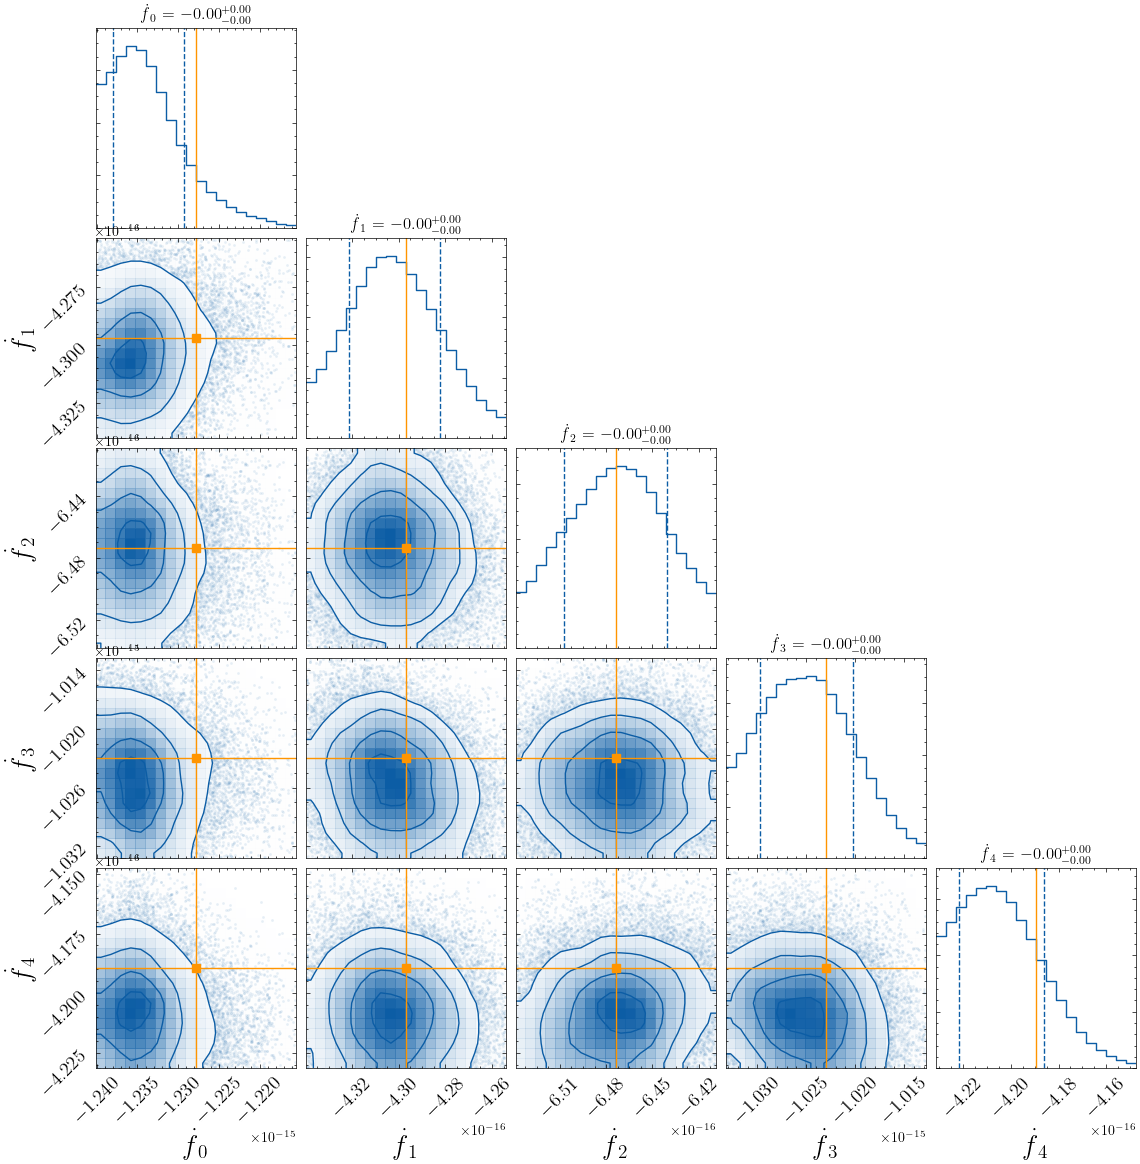

**********************************************************************
The evidence is: -860936.8612164545
Number of samples:
17872
Truths/Medians/Variances
$\sigma_p^0$ 5.054028399366765e-20 1.379745410647476e-20 4.2336607479374355e-40
$\sigma_p^1$ 6.644933202006474e-20 3.976764431869135e-21 4.869809767771105e-41
$\sigma_p^2$ 2.4231055016152945e-20 3.863538342669034e-21 4.2545680395662464e-41
$\sigma_p^3$ 5.255055881680675e-21 1.622268962217105e-20 4.360622492669057e-40
$\sigma_p^4$ 4.059888409075103e-20 5.9969533979862605e-21 2.203851952445255e-40
running with increased label size
Exception - likely because corner.corner cannot find nice contours since NS did not coverge well
There is probably a large difference in the medians and the truth values
Skipping plotting
**********************************************************************


In [6]:
import numpy as np 
path = "../data/nested_sampling/data_for_manuscript/paper_canonical_example_earth_terms_1237_v3_result.json"
plot_all_corners(path,1237,save_id='representative_example_v3',tol=0.01)